In [ ]:
import numpy as np
from pytestlab.instruments import AutoInstrument
import time


In [57]:

# Define the voltage sweep parameters
start_voltage = 2.4  # Volts
stop_voltage = 2.65  # Volts
step_number = 40
voltages= np.linspace(start_voltage, stop_voltage, step_number)


In [65]:

# Instantiate the instruments
try:
    psu = AutoInstrument.from_config("keysight/EDU36311A")
    dmm = AutoInstrument.from_config("keysight/EDU34450A")
except Exception as e:
    print(f"Error initializing instruments: {e}")
    exit()

# Channel to use for the power supply
psu_channel = 1

# Initialize lists to store data
measured_voltages = []
measured_currents = []

try:
    # Configure the power supply
    psu.set_voltage(psu_channel, start_voltage)  # Set initial voltage
    psu.set_current(psu_channel, 0.05)  # Set a current limit (adjust as needed)
    psu.output(psu_channel, True)  # Enable the output

    # Perform the DC analysis sweep
    for voltage in voltages:
        psu.set_voltage(psu_channel, voltage)
        time.sleep(0.1)  # Allow the voltage to stabilize

        # Measure the voltage and current using the multimeter
        measured_voltage = dmm.measure(measurement_type="VOLTAGE", mode="DC")
        # measured_current = dmm.measure(measurement_type="CURRENT", mode="DC")

        measured_voltages.append(measured_voltage.values)
        # measured_currents.append(measured_current.values)

        print(f"Set Voltage: {voltage:.2f} V, Measured Voltage: {measured_voltage.values:.4f} V")

except Exception as e:
    print(f"Error during DC analysis: {e}")

finally:
    # Clean up
    if 'psu' in locals():
        psu.output(psu_channel, False)  # Disable the power supply output
        psu.close()
    if 'dmm' in locals():
        dmm.close()


Set Voltage: 2.40 V, Measured Voltage: 0.0328 V
Set Voltage: 2.41 V, Measured Voltage: 0.0342 V
Set Voltage: 2.41 V, Measured Voltage: 0.0377 V
Set Voltage: 2.42 V, Measured Voltage: 0.0423 V
Set Voltage: 2.43 V, Measured Voltage: 0.0471 V
Set Voltage: 2.43 V, Measured Voltage: 0.0530 V
Set Voltage: 2.44 V, Measured Voltage: 0.0612 V
Set Voltage: 2.44 V, Measured Voltage: 0.0712 V
Set Voltage: 2.45 V, Measured Voltage: 0.0834 V
Set Voltage: 2.46 V, Measured Voltage: 0.1000 V
Set Voltage: 2.46 V, Measured Voltage: 0.1197 V
Set Voltage: 2.47 V, Measured Voltage: 0.1440 V
Set Voltage: 2.48 V, Measured Voltage: 0.1743 V
Set Voltage: 2.48 V, Measured Voltage: 0.2123 V
Set Voltage: 2.49 V, Measured Voltage: 0.2589 V
Set Voltage: 2.50 V, Measured Voltage: 0.3162 V
Set Voltage: 2.50 V, Measured Voltage: 0.3912 V
Set Voltage: 2.51 V, Measured Voltage: 0.4771 V
Set Voltage: 2.52 V, Measured Voltage: 0.5812 V
Set Voltage: 2.52 V, Measured Voltage: 0.7056 V
Set Voltage: 2.53 V, Measured Voltage: 0

In [66]:
# Save the arrays to a single file
file_path = "dc_250k_0p_high.npz"  # Use the .npz extension
np.savez(file_path, arr1=voltages, arr2=measured_voltages)

print(f"Arrays saved to {file_path}")

Arrays saved to dc_250k_0p_high.npz


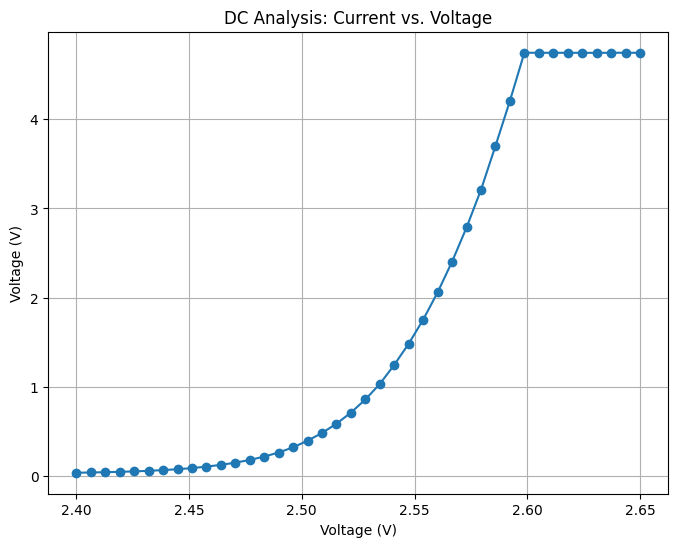

In [64]:

# Optional: You can plot the results using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(voltages, measured_voltages, marker='o')
plt.xlabel("Voltage (V)")
plt.ylabel("Voltage (V)")
plt.title("DC Analysis: Current vs. Voltage")
plt.grid(True)
plt.show()